In [ ]:
# This method uses total static and a correction image
# that undoes the static.

# However, you can see that at the bottom, the
# correction image carries traces of the original

# Plus, you'd need a shader or JS for this,
# and if you use JS, I assumb you're putting it
# into an <img> that a scraper can access

In [1]:
import numpy as np
import glob
from   PIL import Image, ImageOps
import matplotlib.pyplot as plt
import random

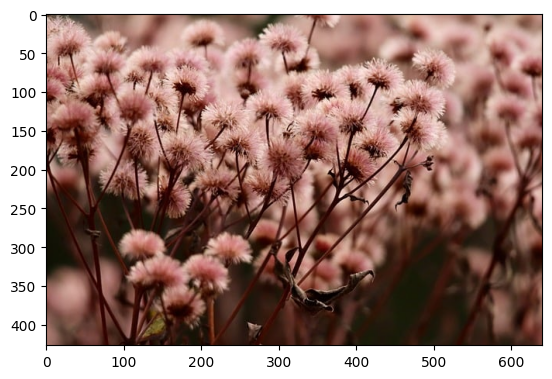

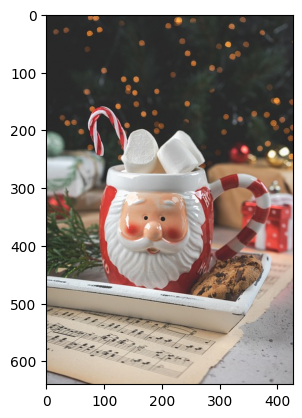

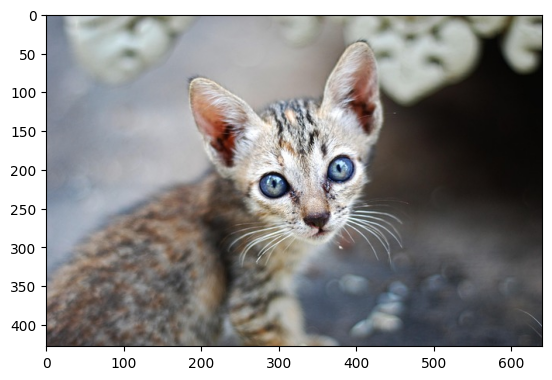

In [2]:
images = []

for filename in glob.glob('demo images/*.jpg'): #assuming gif
    im = Image.open(filename)
    im = np.array(im).astype(np.float32) / 255
    images.append(im)

    plt.imshow(im)
    plt.show()

In [3]:
def get_noisy_images(image, display_process = False):
    """Image should be of the format
    (height, width, channels), and be 
    filled with floats between 0 and 1.
    
    Returns a list of static images
    
    display_process tells whether or not
    to plot the static images as they are created"""
    
    # Start with pure random noise
    random_noise = np.random.uniform(0, 1, image.shape)

    if display_process:
        plt.imshow(random_noise)
        plt.show()

    # sometimes the difference is negative, so we scale
    # -1, 1 to
    # 0, 1
    # to be rescaled later.
    noise_difference = (image - random_noise) / 2 + .5
    
    return random_noise, noise_difference

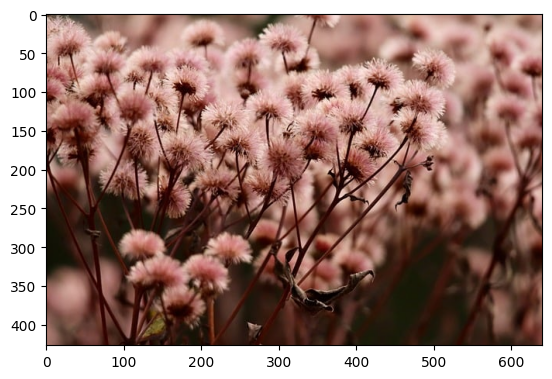

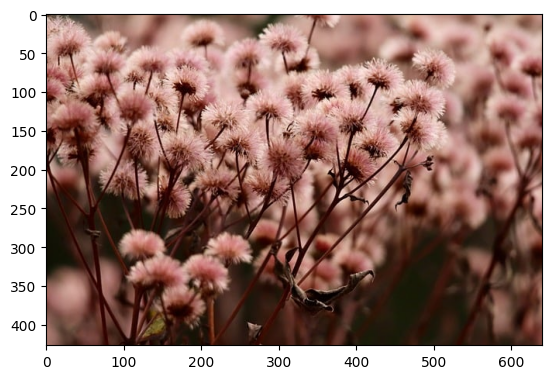

Difference between original and reconstructed image: 3.097522238704187e-14


In [4]:
original_image = random.choice(images)
A, B = get_noisy_images(original_image)
reconstructed_image = (A+((B - .5) * 2))

plt.imshow(original_image)
plt.show()
plt.imshow(reconstructed_image)
plt.show()

print("Difference between original and reconstructed image:", np.sum(original_image - reconstructed_image))


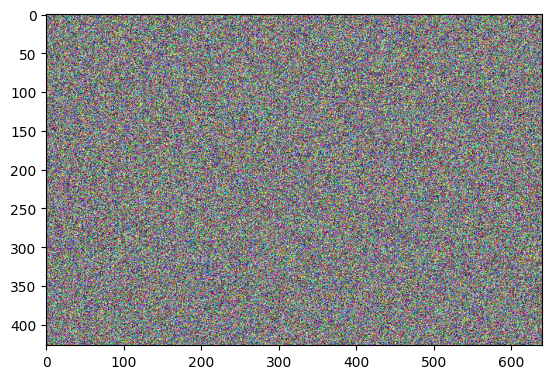

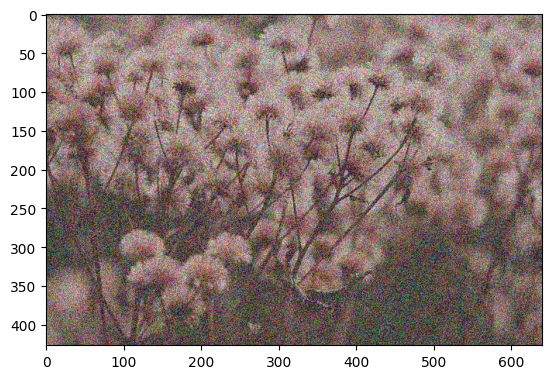

In [5]:
plt.imshow(A)
plt.show()
plt.imshow(B)
plt.show()